In [60]:
include("../src/AdsorptionModel.jl")
@time sol, data = simulation(N=10, tads=7200)

  0.537277 seconds (4.53 M allocations: 323.306 MiB, 7.64% gc time, 70.39% compilation time: 90% of which was recompilation)


(Main.sol, AdsorptionData(1, 2, 3, 4, 5, 6, 7, 8, 1, 2))

In [61]:
using XLSX
using DataFrames

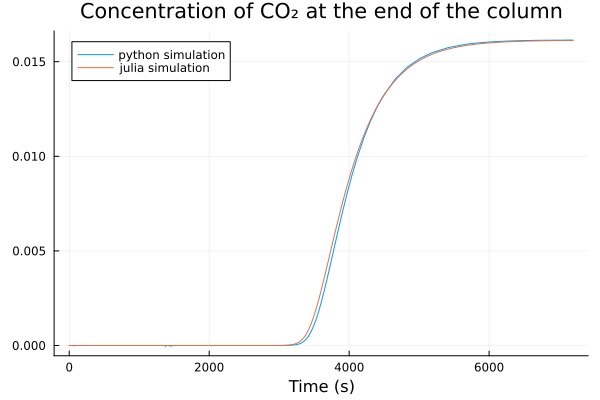

In [62]:
df = XLSX.readtable("../excels/x_sol_ads_cycle0.xlsx", 1) |> DataFrame
plot(parse.(Float64, names(df)), collect(df[10, :]), label="python simulation")
ts = 1:7200
plot!(ts, [sol(t)[data.iCO2, end] for t in ts], label="julia simulation")
xlabel!("Time (s)")
title!("Concentration of CO₂ at the end of the column")